In [1]:
from data_processing import *
from plot_functions import *
import argparse
import numpy as np
import pandas as pd
from pymol import cmd


parser = argparse.ArgumentParser(description='Statistical analysis of HDX/MS data for curated RbsR peptides in one or more functional states.')
parser.add_argument('--pm', dest='pm', help="path to pymol structure", required=True)
parser.add_argument('--t', '--table', dest='table', help="path to uptake table", nargs='+', required=True)
parser.add_argument('--r', '--ranges', dest='ranges', help='path to ranges list csv')
parser.add_argument('--e', '--exclude', dest='exclude', action='store_true', help='exclude rather than include rangeslist')
parser.add_argument('--s1', dest='s1', help='first state to compare')
parser.add_argument('--s2', dest='s2', help='second state to compare')
parser.add_argument('--compare', dest='compare', help='dna, ligand, both', nargs=3)
parser.add_argument('--cbarmax', dest='cbarmax', type=float, help='max value for colorbar axis for dDbar')
parser.add_argument('--ldmin', dest='ldmin', type=float, help='in dDbar, minimum difference threshold between ligand/dna states')



args = parser.parse_args(args=['--t', './EcPFK_20230707_BioRep1/peptide_pool_20230724.csv','./EcPFK_20230424/peptide_pool_20230502.csv'
                               '--r', './EcPFK_20230707_BioRep1/ranges_list_e.csv', 
                               '--pm', '../example/2dri_protein.pdb',])

#args.table = ['../example/10-25_rbsb_pool_results-CLEANED.csv']
#args.ranges = ['../example/rangeslist-10-25-select-cleaned.csv']



In [2]:

args.tables = ['../example/10-25_rbsb_pool_results-CLEANED.csv','../example/10-18-RbsB_peptide_pool_results-CLEAN.csv']
args.ranges = ['../example/rangeslist-10-25-select-cleaned.csv', '../example/rangeslist-10-18-select-cleaned.csv']
args.pm = '../example/2dri_protein.pdb'
args.exclude = False

# load the data
hdxms_data_list = []
for i in range(len(args.tables)):

    if args.exclude:
        cleaned = read_hdx_tables(args.tables[i], args.ranges[i], exclude=True)
        hdxms_data = load_dataframe_to_hdxmsdata(cleaned)
        hdxms_data.reindex_peptide_from_pdb(args.pm, first_residue_index=1)
    else:
        print(args.tables[i])
        cleaned = read_hdx_tables([args.tables[i]], [args.ranges[i]])
        hdxms_data = load_dataframe_to_hdxmsdata(cleaned)
        hdxms_data.reindex_peptide_from_pdb(args.pm, first_residue_index=1)
    
    hdxms_data_list.append(hdxms_data)

../example/10-25_rbsb_pool_results-CLEANED.csv
rangeslist included !
Peptide reindexed with offset -25
../example/10-18-RbsB_peptide_pool_results-CLEAN.csv
rangeslist included !
Peptide reindexed with offset -25


In [3]:
[state.add_all_subtract() for data in hdxms_data_list for state in data.states]

319 new peptides added to the protein state.
149 new peptides added to the protein state.
57 new peptides added to the protein state.
11 new peptides added to the protein state.
0 new peptides added to the protein state.
317 new peptides added to the protein state.
146 new peptides added to the protein state.
54 new peptides added to the protein state.
6 new peptides added to the protein state.
1 new peptides added to the protein state.
0 new peptides added to the protein state.
141 new peptides added to the protein state.
63 new peptides added to the protein state.
21 new peptides added to the protein state.
6 new peptides added to the protein state.
1 new peptides added to the protein state.
6 new peptides added to the protein state.
0 new peptides added to the protein state.
141 new peptides added to the protein state.
62 new peptides added to the protein state.
18 new peptides added to the protein state.
6 new peptides added to the protein state.
1 new peptides added to the protein

[None, None, None, None]

In [4]:
hdxms_data_list[0]

In [6]:
df = revert_hdxmsdata_to_dataframe(hdxms_data_list[0])
df

,Protein State,Sequence,Start,End,Deut Time (sec),#D,Stddev
0,APO,ALSATVSANA,-11,-2,0.0,0.000000,0.000000
1,APO,ALSATVSANA,-11,-2,30.0,0.691333,0.039273
2,APO,ALSATVSANA,-11,-2,120.0,0.980500,0.088388
3,APO,ALSATVSANA,-11,-2,480.0,0.679333,0.148544
4,APO,ALSATVSANA,-11,-2,960.0,0.798000,0.095063
...,...,...,...,...,...,...,...
13037,RIB,LQG,129,131,960.0,-0.355667,NaN
13038,RIB,LQG,129,131,1920.0,-0.336667,NaN
13039,RIB,LQG,129,131,3840.0,-0.247000,NaN
13040,RIB,LQG,129,131,7680.0,-0.097000,NaN


In [5]:
df = revert_hdxmsdata_to_dataframe(hdxms_data_list[0])

convert_dataframe_to_bayesianhdx_format(df, protein_name='10-25_RBSB', OUTPATH='~/Downloads')

Data saved to ~/Downloads


In [4]:
[state.num_subtracted_added for data in hdxms_data_list for state in data.states]

[536, 524, 238, 234]

In [6]:
single = [peptide for data in hdxms_data_list for state in data.states for peptide in state.peptides if len(peptide.sequence) == 1] 

In [7]:
sorted(set([i.start for i in single]))

[8,
 12,
 13,
 15,
 16,
 19,
 21,
 34,
 39,
 48,
 49,
 50,
 51,
 59,
 62,
 63,
 64,
 77,
 78,
 79,
 82,
 83,
 88,
 126,
 129,
 132,
 133,
 138,
 139,
 142,
 143,
 144,
 148,
 149,
 150,
 153,
 154,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 196,
 197,
 198,
 199,
 200,
 201,
 204,
 210,
 212,
 213,
 223,
 225,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 243,
 261,
 263,
 267]

/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


KeyboardInterrupt: 

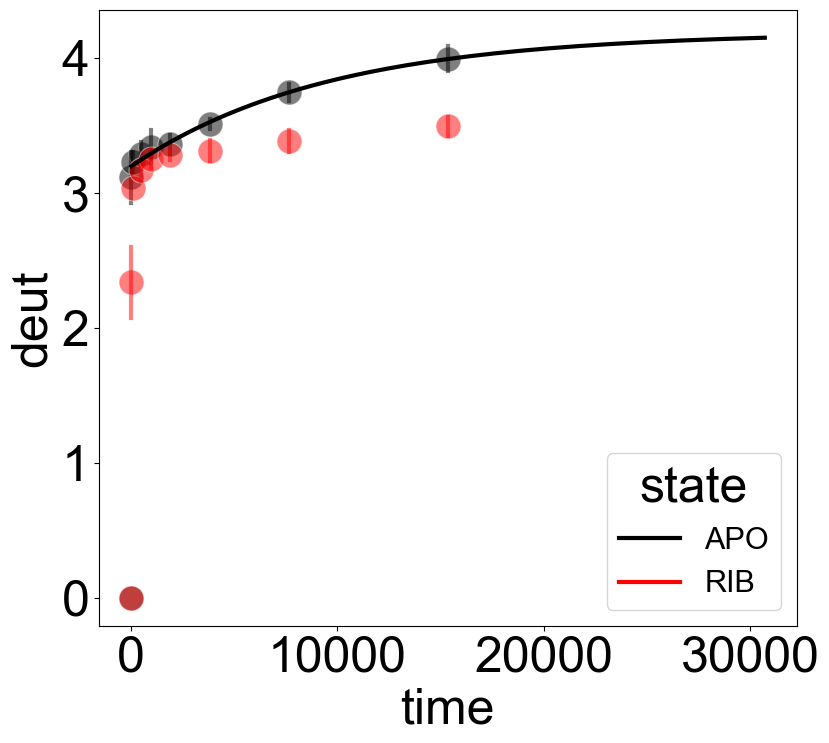

In [7]:
for pep in hdxms_data_list[0].states[1].peptides:
    uptake = UptakePlot(hdxms_data_list, pep.identifier)
    fig = uptake.uptakeplot
    fig.savefig(f"/Users/chenlin/Downloads/test/{pep.identifier}.png")

In [306]:
all_data = pd.concat([revert_hdxmsdata_to_dataframe(i) for i in hdxms_data_list]).reset_index(drop=True)

Data saved to ~/Downloads


In [288]:
convert_dataframe_to_bayesianhdx_format(all_data, protein_name='2dri_protein', OUTPATH='~/Downloads')

Data saved to ~/Downloads


# Make uptake plot

In [8]:
uptake = UptakePlot(hdxms_data_list, '113-126 GDYIAKKAGEGAKV')

/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


In [9]:
uptake.get_average_peptide('APO').new_fit()

(array([   31.6227766 ,    33.89814803,    36.33724053,    38.95183443,
           41.75455767,    44.75894684,    47.9795125 ,    51.43180934,
           55.13251124,    59.09949182,    63.35191078,    67.91030643,
           72.79669489,    78.03467641,    83.64954936,    89.66843241,
           96.12039555,   103.03660041,   110.45045085,   118.39775424,
          126.91689442,   136.04901708,   145.8382285 ,   156.33180855,
          167.58043907,   179.63844863,   192.56407492,   206.41974607,
          221.27238212,   237.19371824,   254.2606512 ,   272.5556108 ,
          292.1669579 ,   313.18941129,   335.72450509,   359.88107917,
          385.7758048 ,   413.53374818,   443.28897447,   475.18519528,
          509.37646281,   546.02791383,   585.31656731,   627.43217937,
          672.57815974,   720.97255422,   772.84909778,   828.45834344,
          888.06887242,   951.96859131,  1020.4661226 ,  1093.89229526,
         1172.60174262,  1256.97461509,  1347.4184163 ,  1444.36

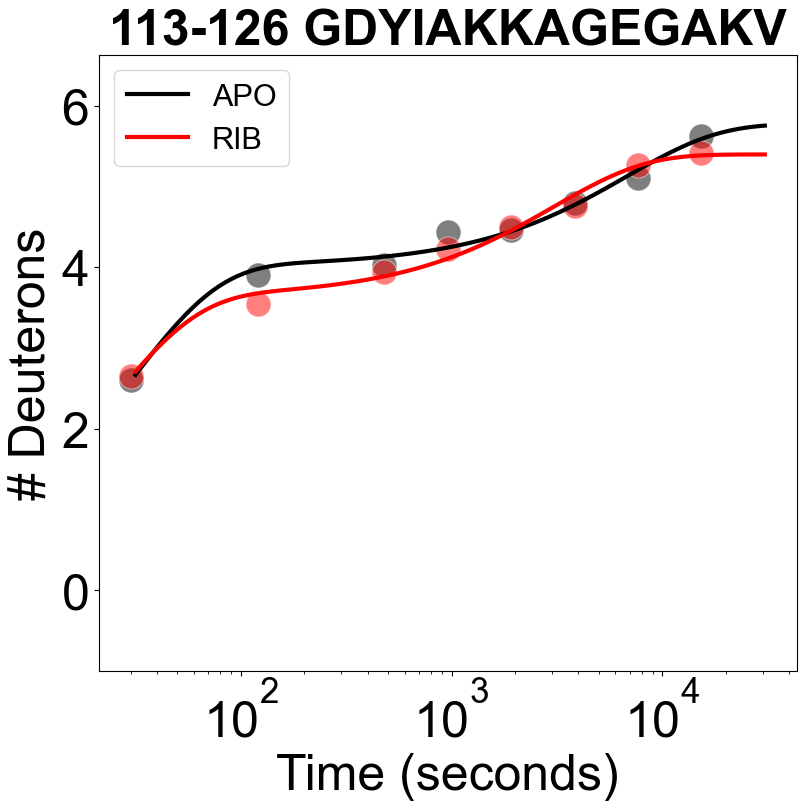

In [10]:
uptake.uptakeplot

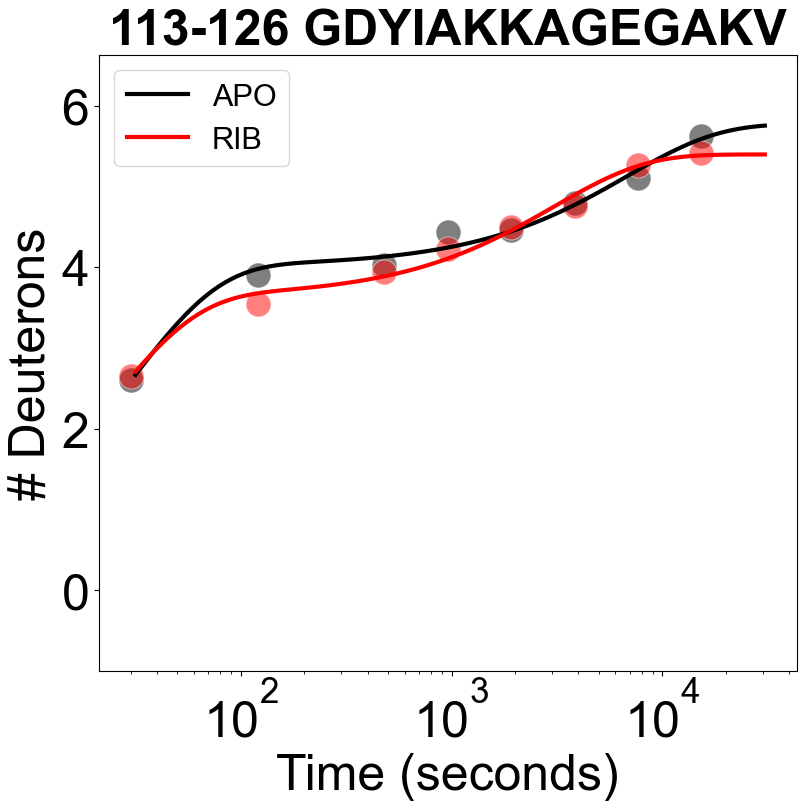

In [12]:
uptake.uptakeplot

In [12]:
# make a uptake plot for all the peptides in hdms_data
uptakes = UptakePlotsCollection(if_plot_fit=True)
uptakes.add_plot_all(hdxms_data_list)
# save all the plots
uptakes.save_plots('/Users/chenlin/Downloads/')

/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=2


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=2


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=2
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3

Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4
Error in fitting peptide: exp_num=2


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=3
Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Error in fitting peptide: exp_num=4


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes

Error in fitting peptide: exp_num=3


/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3/envs/openmm/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/chenlin/opt/anaconda3

# Compare different protein states

### make compare object

In [4]:
# make compare object

state1 = 'APO'
state2 = 'RIB'

state1_list = [i.get_state(state1) for i in hdxms_data_list]
state2_list = [i.get_state(state2) for i in hdxms_data_list]

compare = HDXStatePeptideCompares(state1_list, state2_list)
compare.add_all_compare()

compare1 = HDXStatePeptideCompares([hdxms_data.get_state(state1)], [hdxms_data.get_state(state2)])
compare1.add_all_compare()

In [5]:
res_compares = HDXStateResidueCompares([i for i in range(1, 320)], state1_list, state2_list)
res_compares.add_all_compare()

create_compare_pymol_plot(res_compares, 0.2, pdb_file=args.pm, path='/Users/chenlin/Downloads/')

In [10]:
compare.peptide_compares[0].compare_info

'APO-RIB: -13--2 AVALSATVSANA'

### plot heatmap

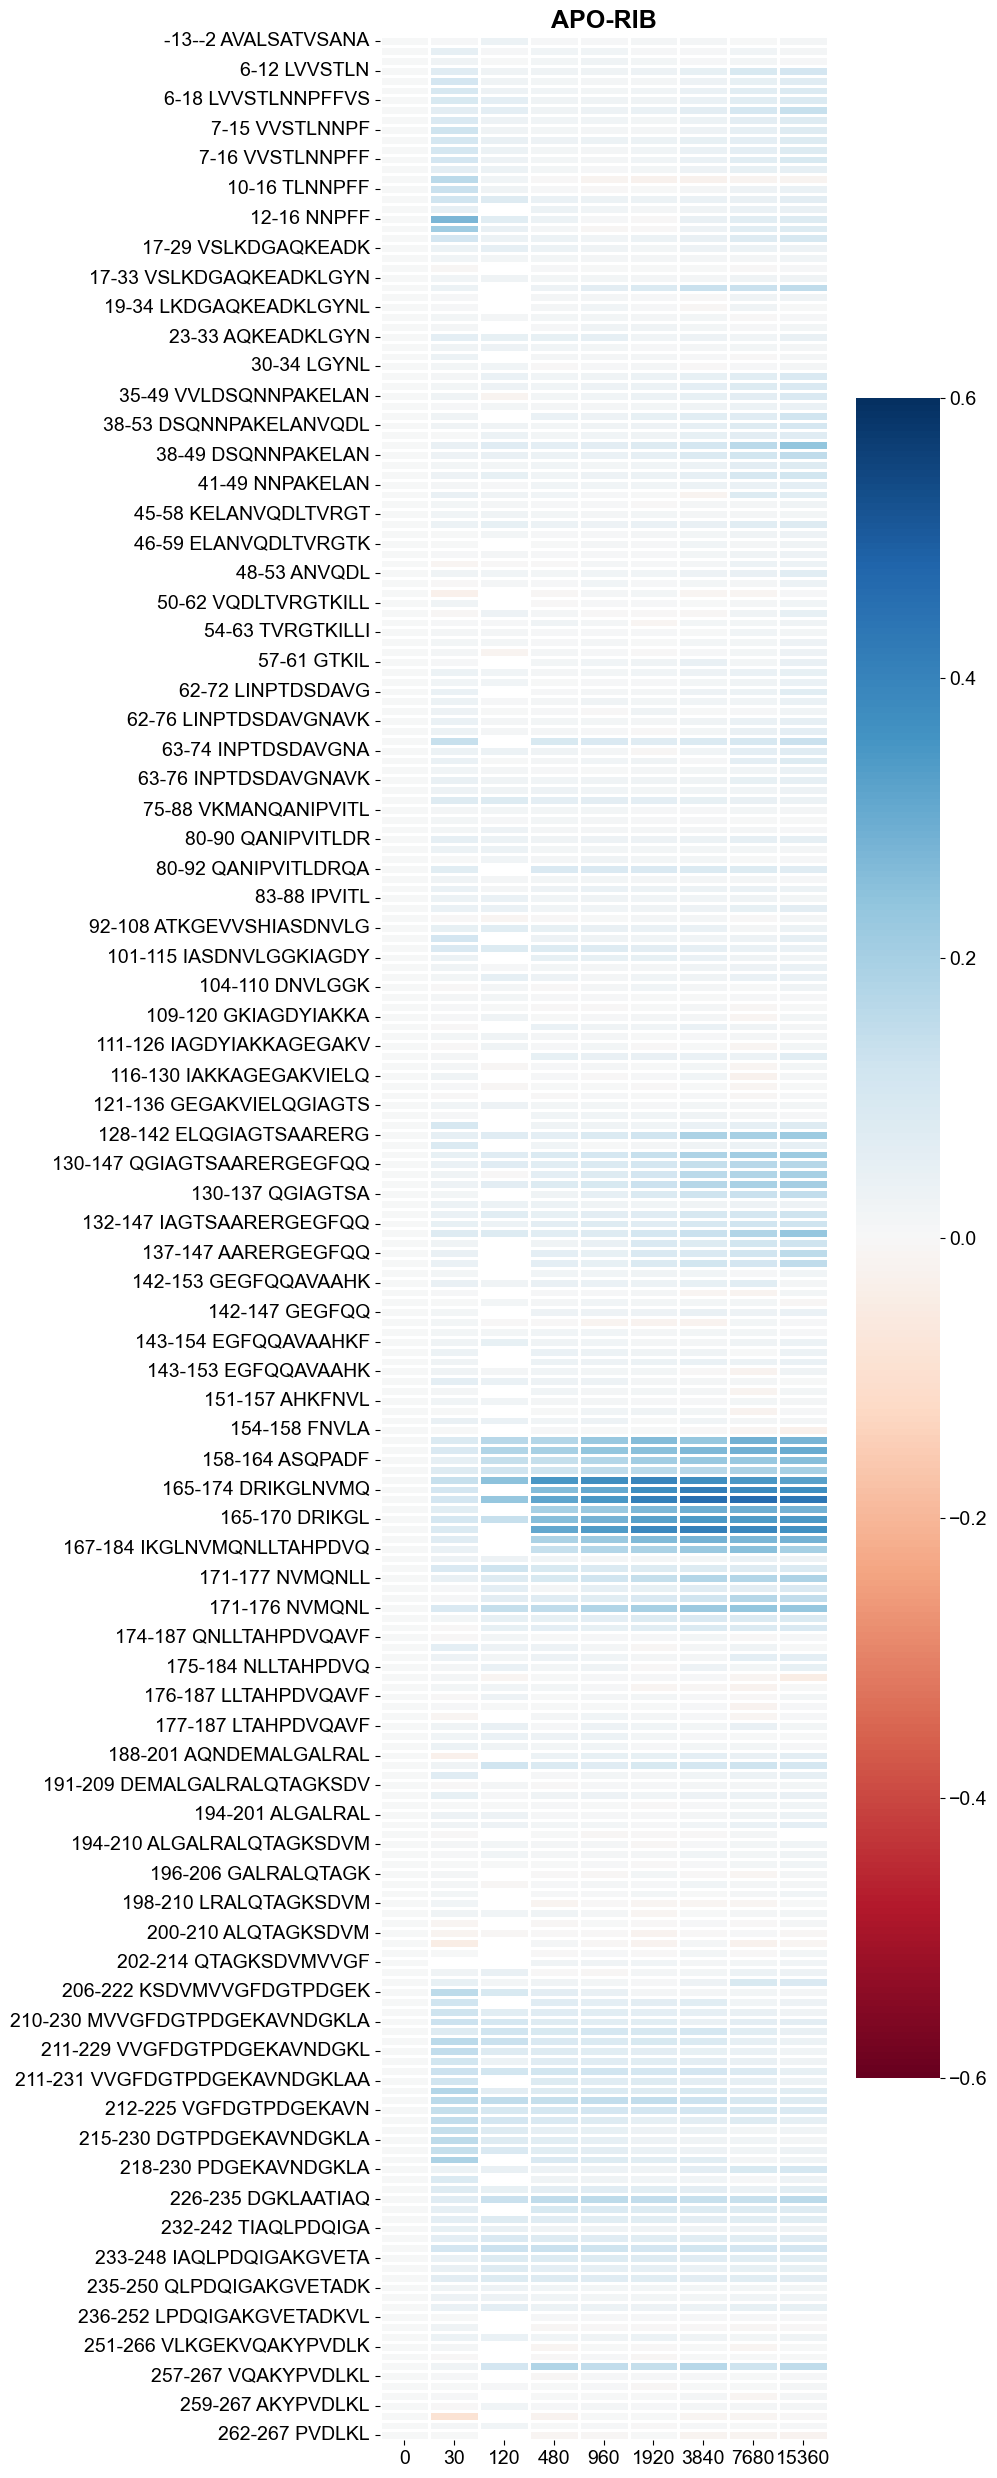

In [11]:
create_heatmap_compare_tp(compare, 0.6)

### plot to pymol

In [17]:
#create_compare_pymol_plot(compare, colorbar_max=0.05, pdb_file='../example/2dri_protein.pdb', path='/Users/chenlin/Downloads/')

### make all the plots and save them




In [18]:
from itertools import product

items =[state.state_name for state in hdxms_data.states]
combinations = product(['APO'], [x for x in items if x != 'APO'])


OUTDIR = '/Users/chenlin/Downloads/rbsb_output/'
if not os.path.exists(OUTDIR):
    os.makedirs(OUTDIR)

for state1_name, state2_name in combinations:

    state1_list = [i.get_state(state1_name) for i in hdxms_data_list]
    state2_list = [i.get_state(state2_name) for i in hdxms_data_list]

    compare = HDXStatePeptideCompares(state1_list, state2_list)
    compare.add_all_compare()

    heatmap_compare_tp = create_heatmap_compare_tp(compare, 0.5)
    heatmap_compare_tp.savefig(f'{OUTDIR}/{state1}-{state2}-heatmap-tp.png')

    heatmap_compare = create_heatmap_compare(compare, 0.5)
    heatmap_compare.savefig(f'{OUTDIR}/{state1}-{state2}-heatmap.png')

    create_compare_pymol_plot(compare, colorbar_max=0.2, pdb_file=args.pm, path=OUTDIR)



    res_compares = HDXStateResidueCompares([i for i in range(1, 320)], state1_list, state2_list)
    res_compares.add_all_compare()

    create_compare_pymol_plot(res_compares, 0.2, pdb_file=args.pm, path=OUTDIR)